รหัส : 6304101381

ชื่อ-สกุล : นางสาวอุษา จุ้ยแหวว

กลุ่ม : 2  

### จุดประสงค์
- เพื่อศึกษา Optimal Page algorithm ซึ่งเป็นอัลกอริทึมสำหรับการทำ Page replacement
- เพื่อนำไปประยุกต์ใช้สำหรับภาษาอังกฤษ
### งานการประยุกต์ใช้
- สร้าง reference word สำหรับภาษาอังกฤษ โดยกำหนดให้มีคำอ้างอิงจะต้องมีคำที่ไม่ซ้ำกันจำนวนอย่างน้อย 20 คำ (5 คะแนน)
ทำให้เกิด page hit อย่างน้อย 5 ครั้ง โดยคำที่จะใช้สำหรับทำการแทนที่ (replacement)จะต้องเป็นคำที่มีชนิดเดียวกัน (10 คะแนน) เช่น
 - ประธาน จะหาคำที่ทำหน้าที่ตรงกับ ประธาน
 - กริยา จะหาคำที่ทำหน้าที่ตรงกับ กริยา
 - กรรม จะหาคำที่ทำหน้าที่ตรงกับ กรรม
- ให้แสดง Fault rate และ Hit rate (15 คะแนน)
- ให้แสดงกราฟความสัมพันธ์ของแต่ละโหนด (20 คะแนน)

### อัลกอริทึมเพจที่เหมาะสมที่สุด (Optimal Page algorithm) {มองจากอนาคต}
- อัลกอริทึมการเปลี่ยนเพจที่เหมาะสมที่สุด มีอัตราความผิดพลาดของเพจต่ำที่สุด 
- เพจที่ไม่ถูกใช้เป็นระยะเวลานานที่สุดในอนาคต คือเพจที่จะถูกเลือกเพื่อแทนที่


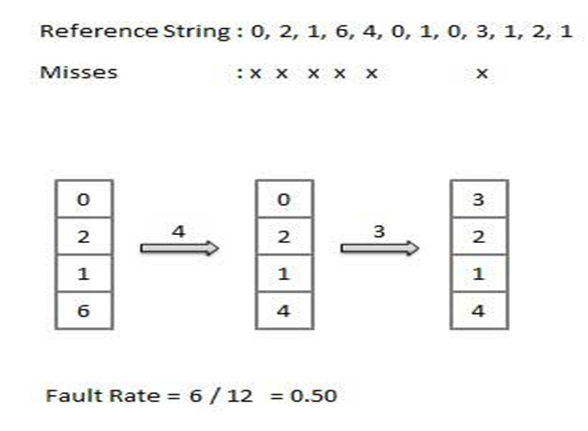

### จากลำดับข้อมูล [0, 2, 1, 6], [4], 0, 1, 0, [3], 1, 2, 1
1. Pf (4) [-]/0, [-]/2, [-]/1, [-]/6 -> [0, 2, 1, 6*] 
2. Pf (5) [6]/4 -> [0, 2, 1, 4*]
3. Pf (5) [0]/0 -> [0, 2, 1, 4*]
4. Pf (5) [1]/1 -> [0, 2, 1, 4*]
5. Pf (5) [0]/0 -> [0, 2, 1, 4*]
6. Pf (6) [4]/3 -> [0, 2, 1, 4*]
7. Pf (6) [1]/1 -> [0, 2, 1, 3*]
8. Pf (6) [2]/2 -> [0, 2, 1, 3*]
9. Pf (6) [1]/1 -> [0, 2, 1, 3*]


In [55]:
#Optimal page replacement algorithm (OPT or OPR) implementation in python
#Created By: Suman Adhikari

#print("Enter the number of frames: ",end="")
#capacity = int(input())
capacity = 4
f,fault,pf = [],0,'No'
#print("Enter the reference string: ",end="")

#inputs = input().strip().split()
inputs = ['she','sings','doremi','babyshark','they','sings','dance','piano','dance','doremi','listen','they','we','listen','rice','game','listen','eat','rice','we','I','music','eat','play','jump','I','he','sushi','jump','game','hit','drums','sushi','hit','he',]
#inputs = ['0' , '2' , '1'  , '6'  , '4'  , '0' , '1'  , '0' , '3'  , '1'  , '2', '1']
#inputs = ['ฉัน', 'รอ', 'เธอ', 'กลับ', 'นาน', 'ฉัน', 'เธอ', 'ฉัน', 'คุณ', 'เธอ', 'รอ', 'เธอ']
print(f"inputs:{inputs}")
#s = list(map(int,inputs))
s = list(map(str,inputs))
#s = list(map(int,input().strip().split()))
print("\nString|Frame →\t",end='')
for i in range(capacity):
    print(i,end=' ')
print("Fault\n   ↓\n")
occurance = [None for i in range(capacity)]
for i in range(len(s)):
    if s[i] not in f:
        if len(f)<capacity:
            f.append(s[i])
        else:
            for x in range(len(f)):
                if f[x] not in s[i+1:]:
                    f[x] = s[i]
                    break
                else:
                    occurance[x] = s[i+1:].index(f[x])
            else:
                f[occurance.index(max(occurance))] = s[i]
        fault += 1
        pf = 'Miss'
    else:
        pf = 'Hit'
    print("   %s\t\t"%s[i],end='')
    for x in f:
        print(x,end=' ')

    for x in range(capacity-len(f)):
        print(' ',end=' ')
    print(" %s"%pf)
print(f"\nTotal requests: {len(s)}\nTotal Page Faults: {fault}\nFault Rate:{fault/len(s)*100}\nHit Rate: {(len(s)-fault)/len(s)*100}")

inputs:['she', 'sings', 'doremi', 'babyshark', 'they', 'sings', 'dance', 'piano', 'dance', 'doremi', 'listen', 'they', 'we', 'listen', 'rice', 'game', 'listen', 'eat', 'rice', 'we', 'I', 'music', 'eat', 'play', 'jump', 'I', 'he', 'sushi', 'jump', 'game', 'hit', 'drums', 'sushi', 'hit', 'he']

String|Frame →	0 1 2 3 Fault
   ↓

   she		she        Miss
   sings		she sings      Miss
   doremi		she sings doremi    Miss
   babyshark		she sings doremi babyshark  Miss
   they		they sings doremi babyshark  Miss
   sings		they sings doremi babyshark  Hit
   dance		they dance doremi babyshark  Miss
   piano		they dance doremi piano  Miss
   dance		they dance doremi piano  Hit
   doremi		they dance doremi piano  Hit
   listen		they listen doremi piano  Miss
   they		they listen doremi piano  Hit
   we		we listen doremi piano  Miss
   listen		we listen doremi piano  Hit
   rice		we listen rice piano  Miss
   game		we listen rice game  Miss
   listen		we listen rice game  Hit
   eat		we eat rice ga

In [56]:
!apt install libgraphviz-dev          
!pip install pygraphviz                

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import pygraphviz as pgv
d={'I love': {'test'}, '2': '3'} #ใช้ dictionry
d.update({'3':'4'})
A=pgv.AGraph(d)
A.to_string()  # Colab can display dot too, but png is simpler

'strict graph "" {\n\t"I love" -- test;\n\t2 -- 3;\n\t3 -- 4;\n}\n'

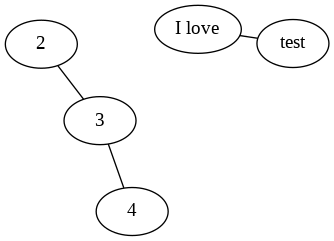

In [58]:
A.layout()
A.draw('file.png')
from IPython.display import Image
Image('file.png')

In [59]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.__version__  

mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

import matplotlib.pyplot as plt

Enter the number of frames: Enter the reference string: inputs:['she', 'sings', 'doremi', 'babyshark', 'they', 'sings', 'dance', 'piano', 'dance', 'doremi', 'listen', 'they', 'we', 'listen', 'rice', 'game', 'listen', 'eat', 'rice', 'we', 'I', 'music', 'eat', 'play', 'jump', 'I', 'he', 'sushi', 'jump', 'game', 'hit', 'drums', 'sushi', 'hit', 'he']

String|Frame →	0 1 2 3 Fault
   ↓

   she		she she,0
       Yes
   sings		she sings she,0
sings,1
Edge from: she to sings
     Yes
   doremi		she sings doremi she,0
sings,1
doremi,2
Edge from: sings to doremi
   Yes
   babyshark		she sings doremi babyshark she,0
sings,1
doremi,2
babyshark,3
Edge from: doremi to babyshark
 Yes
   they		they sings doremi babyshark they,0
Edge from: they to sings
 Yes
   sings		they sings doremi babyshark they,0
sings,1
Edge from: they to sings
 No
   dance		they dance doremi babyshark they,0
dance,1
Edge from: they to dance
 Yes
   piano		they dance doremi piano they,0
dance,1
doremi,2
piano,3
Edge from: doremi

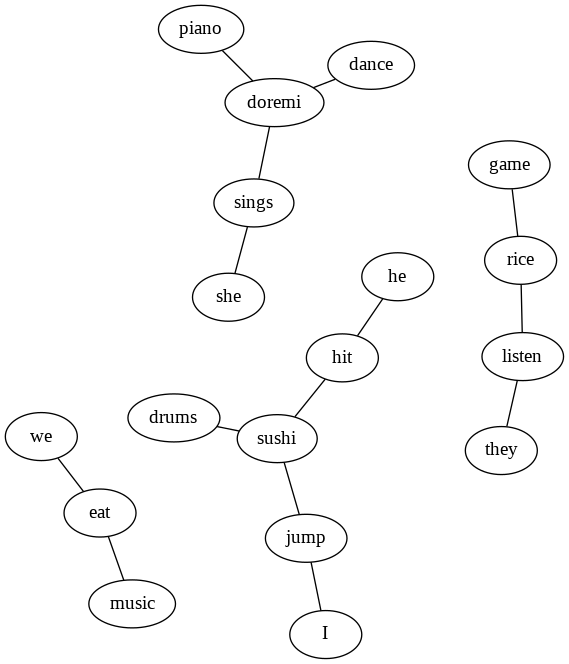

In [60]:
from IPython.display import Image

print("Enter the number of frames: ",end="")
#capacity = int(input())
capacity = 4
f,fault,pf = [],0,'No'
print("Enter the reference string: ",end="")

#inputs = input().strip().split()
# inputs =   ['0' , '2'   , '1'  ,  '6'         , '4'     , '0' , '1'  , '0' ,  '3'  , '1'  , '2',    '1']
inputs = ['she','sings','doremi','babyshark','they','sings','dance','piano','dance','doremi','listen','they','we','listen','rice','game','listen','eat','rice','we','I','music','eat','play','jump','I','he','sushi','jump','game','hit','drums','sushi','hit','he',]
sentence ={}
print(f"inputs:{inputs}")
#s = list(map(int,inputs))
s = list(map(str,inputs))
#s = list(map(int,input().strip().split()))
print("\nString|Frame →\t",end='')
for i in range(capacity):
    print(i,end=' ')
print("Fault\n   ↓\n")
occurance = [None for i in range(capacity)]
for i in range(len(s)):
    if s[i] not in f:
        if len(f)<capacity:
            f.append(s[i])
        else:
            for x in range(len(f)):
                if f[x] not in s[i+1:]:
                    f[x] = s[i]
                    break
                else:
                    occurance[x] = s[i+1:].index(f[x])
            else:
                f[occurance.index(max(occurance))] = s[i]
        fault += 1
        pf = 'Yes'
    else:
        pf = 'No'
    w = s[i]
    print("   %s\t\t"%w,end='')


    for x in f:
        print(x,end=' ')

    for index,word in enumerate(f):
        print(f"{word},{index}")
        if s[i] == word and index-1 >= 0:
            print(f"Edge from: {f[index-1]} to {s[i]}")
            sentence.update({f[index-1]:{s[i]}})
            break
        if s[i] == word and index-1<0 and len(f)>2:
            print(f"Edge from: {s[i]} to {f[index+1]}")
            sentence.update({s[i]:{f[index+1]}})
            break    

    for x in range(capacity-len(f)):
        print(' ',end=' ')
    print(" %s"%pf)
    # แสดงความสัมพันธ์
    sentenses=pgv.AGraph(sentence)
    sentenses.to_string()  # Colab can display dot too, but png is simpler
    sentenses.layout()
    sentenses.draw('file'+str(i)+'.png')
    Image('file'+str(i)+'.png')


print("\nTotal requests: %d\nTotal Page Faults: %d\nFault Rate: %0.2f%%"%(len(s),fault,(fault/len(s))*100))
sentenses=pgv.AGraph(sentence)
sentenses.to_string()  # Colab can display dot too, but png is simpler
sentenses.layout()
sentenses.draw('file'+str(i)+'.png')
Image('file'+str(i)+'.png')